In [1]:
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def getDataReady(data) :
    import math
    data = data;
    data['Age'].fillna(math.floor(data['Age'].mean()),inplace=True)
    data['Fare'].fillna(math.floor(data['Fare'].mean()),inplace=True)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Embarked'] = le.fit_transform(data["Embarked"])
    gender_dummies = pd.get_dummies(data['Sex'],prefix="gender")
    data = pd.concat([gender_dummies,data],axis="columns")
    data.drop(["Ticket","Sex","Cabin","Name"],axis="columns",inplace=True)
    print(data)
    
    return data;

In [5]:
data['Embarked'].isnull().values.any()

True

In [6]:
data = getDataReady(data)

     gender_female  gender_male  PassengerId  Survived  Pclass   Age  SibSp  \
0                0            1            1         0       3  22.0      1   
1                1            0            2         1       1  38.0      1   
2                1            0            3         1       3  26.0      0   
3                1            0            4         1       1  35.0      1   
4                0            1            5         0       3  35.0      0   
..             ...          ...          ...       ...     ...   ...    ...   
886              0            1          887         0       2  27.0      0   
887              1            0          888         1       1  19.0      0   
888              1            0          889         0       3  29.0      1   
889              0            1          890         1       1  26.0      0   
890              0            1          891         0       3  32.0      0   

     Parch     Fare  Embarked  
0        0   7.2500

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

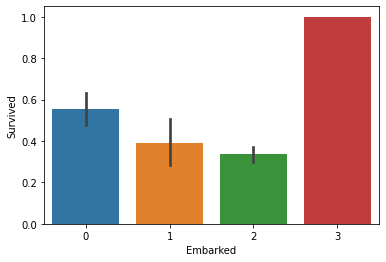

In [7]:
sn.barplot(data['Embarked'],data['Survived'])

In [8]:
data.head()

,gender_female,gender_male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,0,3,22.0,1,0,7.2500,2
1,1,0,2,1,1,38.0,1,0,71.2833,0
2,1,0,3,1,3,26.0,0,0,7.9250,2
3,1,0,4,1,1,35.0,1,0,53.1000,2
4,0,1,5,0,3,35.0,0,0,8.0500,2


In [9]:
data.drop(["PassengerId"],axis="columns",inplace=True)

In [10]:
data

,gender_female,gender_male,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,22.0,1,0,7.2500,2
1,1,0,1,1,38.0,1,0,71.2833,0
2,1,0,1,3,26.0,0,0,7.9250,2
3,1,0,1,1,35.0,1,0,53.1000,2
4,0,1,0,3,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,1,0,2,27.0,0,0,13.0000,2
887,1,0,1,1,19.0,0,0,30.0000,2
888,1,0,0,3,29.0,1,2,23.4500,2
889,0,1,1,1,26.0,0,0,30.0000,0


In [11]:
target = data['Survived']

In [12]:
data = data.drop(['Survived'],axis="columns")

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(data.values,target.values)

RandomForestClassifier(n_estimators=10)

In [14]:
data.head()

,gender_female,gender_male,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,22.0,1,0,7.2500,2
1,1,0,1,38.0,1,0,71.2833,0
2,1,0,3,26.0,0,0,7.9250,2
3,1,0,1,35.0,1,0,53.1000,2
4,0,1,3,35.0,0,0,8.0500,2


In [15]:
model.predict([[0,1,3,34.5,0,0,7,0]])

array([0], dtype=int64)

In [16]:
test_data = pd.read_csv("test.csv")
test_data = getDataReady(test_data)
test_data

     gender_female  gender_male  PassengerId  Pclass   Age  SibSp  Parch  \
0                0            1          892       3  34.5      0      0   
1                1            0          893       3  47.0      1      0   
2                0            1          894       2  62.0      0      0   
3                0            1          895       3  27.0      0      0   
4                1            0          896       3  22.0      1      1   
..             ...          ...          ...     ...   ...    ...    ...   
413              0            1         1305       3  30.0      0      0   
414              1            0         1306       1  39.0      0      0   
415              0            1         1307       3  38.5      0      0   
416              0            1         1308       3  30.0      0      0   
417              0            1         1309       3  30.0      1      1   

         Fare  Embarked  
0      7.8292         1  
1      7.0000         2  
2      9.

,gender_female,gender_male,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,892,3,34.5,0,0,7.8292,1
1,1,0,893,3,47.0,1,0,7.0000,2
2,0,1,894,2,62.0,0,0,9.6875,1
3,0,1,895,3,27.0,0,0,8.6625,2
4,1,0,896,3,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,0,1,1305,3,30.0,0,0,8.0500,2
414,1,0,1306,1,39.0,0,0,108.9000,0
415,0,1,1307,3,38.5,0,0,7.2500,2
416,0,1,1308,3,30.0,0,0,8.0500,2


In [17]:
test_data_x = test_data.drop(["PassengerId"],axis="columns")

In [19]:
test_data['Fare'].isnull().values.any()

False

In [20]:
submitData = pd.DataFrame({"PassengerId":test_data['PassengerId'],"Survived":model.predict(test_data_x.values)})

In [ ]:
test_data.values

In [21]:
submitData

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
submitData.to_csv("submission.csv",index=False)